# ARMA 모델
* array 형태로 작성해야
* ar(1)은 바로 전시점에서 비교하는 것
* ar(2)는 전전시점과 그전에 정상성이 있는지 알아야함 ,(차분을 통해 )
* arima(1,1) ar,ma둘다
* arima(1,0) ar만
* arima(0,1) ma만 
* I는 차분 arma-차분 안하는거, arima-차분한는거


In [2]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# ArmaProcess로 모형 생성하고 nobs만큼 샘플 생성
def gen_arma_samples(ar,ma,nobs):
    arma_model=sm.tsa.ArmaProcess(ar=ar,ma=ma) # 모형정의
    arma_samples= arma_model.generate_sample(nobs) # 샘플생성
    return arma_samples
# drift가 있는 모형은 ArmaProcess에서 처리가 안되어서 수동으로 정의해줘야 함

def gen_random_walk_w_drift(nobs,drift): # drift 감소하는 상태
    init=np.random.normal(size=1,loc=0)
    e=np.random.normal(size=nobs,scale=1)
    y=np.zeros(nobs)
    y[0]=init
    for t in (1,nobs):
        y[t]=drift + 1*y[t-1]+e[t]
        return y

In [4]:
np.random.seed(12345)

white_noise=gen_arma_samples(ar=[1],ma=[1],nobs=250)
# y_t= epsilon_t
random_walk = gen_arma_samples(ar=[1,-1],ma=[1],nobs=250)
# (1-L)y_t = epsilon_t
gef_random_walk_w_drift = gen_random_walk_w_drift(250,2)
#y_t=2+ y_{t-1}+ epsilon_t
stationary_ar_1 = gen_arma_samples(ar=[1,-0.9],ma=[1],nobs=250)
#(1-0.9L)y_t =epsilon_t # ar가중치 -0.9



In [5]:
white_noise


array([-2.04707659e-01,  4.78943338e-01, -5.19438715e-01, -5.55730304e-01,
        1.96578057e+00,  1.39340583e+00,  9.29078767e-02,  2.81746153e-01,
        7.69022568e-01,  1.24643474e+00,  1.00718936e+00, -1.29622111e+00,
        2.74991633e-01,  2.28912879e-01,  1.35291684e+00,  8.86429341e-01,
       -2.00163731e+00, -3.71842537e-01,  1.66902531e+00, -4.38569736e-01,
       -5.39741446e-01,  4.76985010e-01,  3.24894392e+00, -1.02122752e+00,
       -5.77087303e-01,  1.24121276e-01,  3.02613562e-01,  5.23772068e-01,
        9.40277775e-04,  1.34380979e+00, -7.13543985e-01, -8.31153539e-01,
       -2.37023165e+00, -1.86076079e+00, -8.60757398e-01,  5.60145293e-01,
       -1.26593449e+00,  1.19827125e-01, -1.06351245e+00,  3.32882716e-01,
       -2.35941881e+00, -1.99542955e-01, -1.54199553e+00, -9.70735912e-01,
       -1.30703025e+00,  2.86349747e-01,  3.77984111e-01, -7.53886535e-01,
        3.31285650e-01,  1.34974221e+00,  6.98766888e-02,  2.46674110e-01,
       -1.18616011e-02,  

In [6]:
random_walk

array([  1.39407223,   0.31733028,   0.1248643 ,  -0.74632335,
        -0.32547135,  -1.53688242,  -1.79574933,  -2.37739618,
        -3.63781681,  -3.17324202,  -4.24348292,  -3.43926023,
        -3.59599573,  -1.58560572,  -2.47271015,  -3.45064639,
        -3.71786374,  -3.23452591,  -3.63485865,  -3.18497823,
        -2.78538428,  -2.93695908,  -5.49489314,  -5.3340863 ,
        -5.25756123,  -5.5547654 ,  -6.84903942,  -7.73421943,
        -7.92171596,  -8.41527596,  -8.53068892,  -8.88143353,
        -8.83673615,  -9.73449247,  -8.84361897,  -9.99480413,
       -12.60710684, -11.46585665, -12.33299217, -11.94940891,
       -12.38643908, -12.03895027, -13.2691293 , -12.69805117,
       -12.63798995, -12.86351395, -11.51378781, -10.16348807,
       -10.55014139,  -9.68415185,  -7.93691825,  -9.3471644 ,
        -9.72540592, -10.07122659,  -9.69116412,  -9.50216945,
        -8.17887125, -10.44345984, -11.35843845, -11.83740261,
       -10.79021812,  -9.8662697 ,  -9.98041984,  -9.57

In [7]:
gef_random_walk_w_drift 


array([-0.76183721, -0.51315264,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [8]:
stationary_ar_1

array([ 0.15663205,  0.19307552,  1.12958115,  1.75981453,  1.09751   ,
        2.90822627,  1.96465462,  1.59488538,  1.07498676,  0.58707411,
       -0.76977311, -0.16487679, -0.24148939,  0.18384423,  0.06287643,
        0.08745788,  2.6948126 ,  1.6397534 ,  0.96877994, -1.14630377,
       -1.70852653,  1.1290698 ,  2.46761897,  2.85548592,  2.06711047,
        2.37333108,  3.89277734,  2.52918881,  2.95666698,  3.616799  ,
        4.75665458,  3.52472347,  3.64575573,  4.99492361,  3.34773202,
        3.01586204,  1.61370548,  1.15480315,  1.54173191,  1.3865713 ,
        0.57335389,  0.81397678,  2.19815224,  1.67470843,  0.5127577 ,
        0.65137192, -1.09779484, -1.4463961 , -0.75835058, -1.86977978,
       -2.0954435 , -0.7087738 , -0.95160059,  0.72259109,  1.02572022,
       -0.64499062, -1.48137808, -0.68089475,  0.25879504,  0.5011317 ,
        1.39869975,  1.40609736, -0.50696784,  0.13614856,  0.21285918,
        0.84269471,  0.67723055,  1.41140509,  1.41010981,  0.76

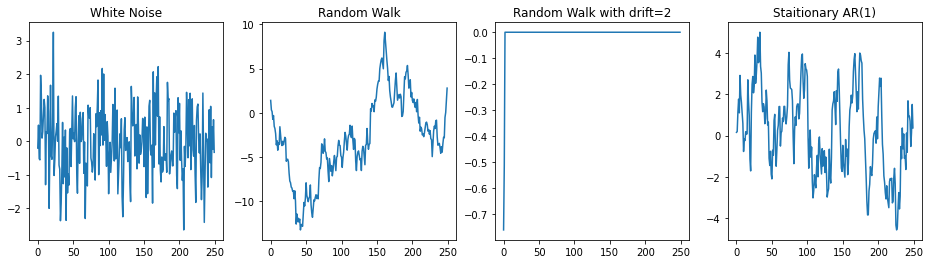

In [9]:
fig,ax=plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("White Noise")
# 자기상관분석을 하므로써 정상성이 있는지 아닌지 알 수 있음
ax[1].plot(random_walk)
ax[1].set_title("Random Walk")

ax[2].plot(gef_random_walk_w_drift)
ax[2].set_title("Random Walk with drift=2")

ax[3].plot(stationary_ar_1)
ax[3].set_title("Staitionary AR(1)")

fig.set_size_inches(16,4)



In [10]:
import pandas as pd
import FinanceDataReader as fdr


In [11]:
df_apple=fdr.DataReader('AAPL',start='2010')

Text(0.5, 1.0, 'Close Price for Apple')

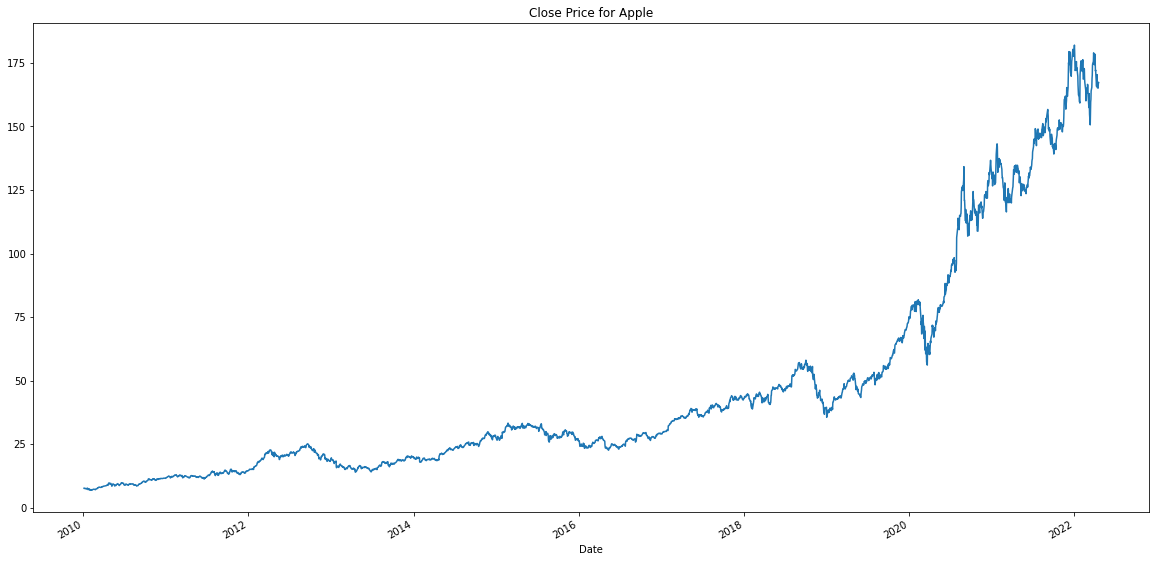

In [12]:
df_apple['Close'].plot(figsize=(20,10))
plt.title('Close Price for Apple')

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


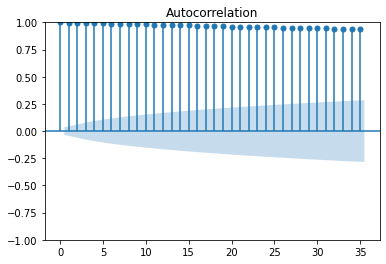

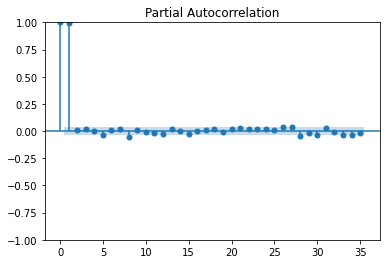

In [14]:
plot_acf(df_apple['Close'])
plot_pacf(df_apple['Close'])
plt.show()

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


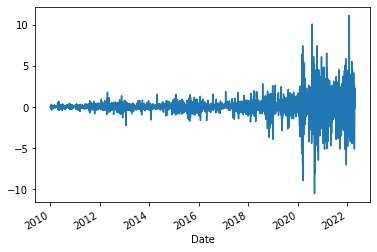

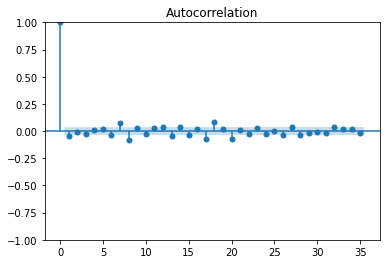

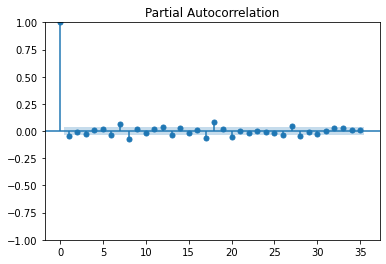

In [15]:
diff_1=df_apple['Close'].diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
model= ARIMA(df_apple['Close'],order=(1,1,0)) # 0,1,1 # 1,1,0
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3096
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4885.462
Date:                Thu, 21 Apr 2022   AIC                           9774.923
Time:                        10:25:37   BIC                           9786.998
Sample:                             0   HQIC                          9779.260
                               - 3096                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0393      0.008     -5.233      0.000      -0.054      -0.025
sigma2         1.3759      0.012    115.930      0.000       1.353       1.399
Ljung-Box (L1) (Q):                   0.02   Jarque-

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
model= ARIMA(df_apple['Close'],order=(0,1,1)) # 0,1,1 # 1,1,0
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3096
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4885.430
Date:                Thu, 21 Apr 2022   AIC                           9774.860
Time:                        10:25:37   BIC                           9786.935
Sample:                             0   HQIC                          9779.196
                               - 3096                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0399      0.008     -5.232      0.000      -0.055      -0.025
sigma2         1.3759      0.012    115.931      0.000       1.353       1.399
Ljung-Box (L1) (Q):                   0.01   Jarque-

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
model= ARIMA(df_apple['Close'],order=(1,1,1)) # 0,1,1 # 1,1,0
model_fit = model.fit()
print(model_fit.summary())

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3096
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4885.188
Date:                Thu, 21 Apr 2022   AIC                           9776.376
Time:                        10:25:38   BIC                           9794.489
Sample:                             0   HQIC                          9782.881
                               - 3096                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3484      0.151      2.313      0.021       0.053       0.644
ma.L1         -0.3873      0.149     -2.603      0.009      -0.679      -0.096
sigma2         1.3757      0.012    115.699      0.0

In [20]:
np.random.seed(12345)


In [21]:
ma_1=gen_arma_samples(ar=[1],ma=[1,1],nobs=250) # y_t= (1+L) * epsilon_t
ma_2=gen_arma_samples(ar=[1],ma=[1,0.5],nobs=250) # y_t= (1+0.5*L) * epsilon_t
ma_3=gen_arma_samples(ar=[1],ma=[1,-2],nobs=250)  # y_t=(1-2*L)epsilon_t



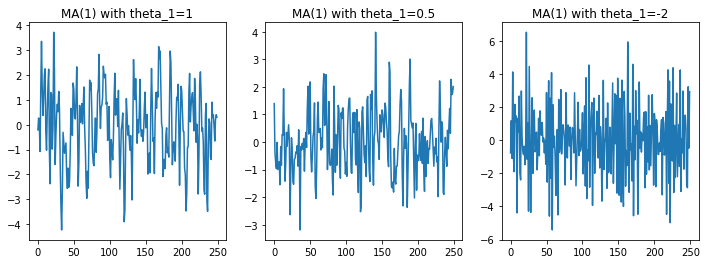

In [22]:
fig,ax =plt.subplots(1,3,figsize=(12,4))

ax[0].plot(ma_1)
ax[0].set_title("MA(1) with theta_1=1")

ax[1].plot(ma_2)
ax[1].set_title("MA(1) with theta_1=0.5")

ax[2].plot(ma_3)
ax[2].set_title("MA(1) with theta_1=-2")

plt.show()